## Importing Data and making Dataframe

In [1016]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats

from sklearn import linear_model

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

train2 = train.copy()

full_df = pd.concat([train, test])

full_df = full_df.drop('Id',axis=1)

In [865]:
print(full_df.keys())
train2.shape

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

(1460, 81)

## Identifying NAs

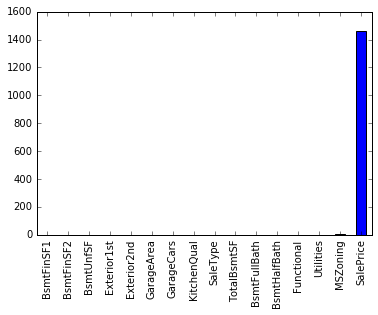

In [985]:
%matplotlib inline

missing = full_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [649]:
train2["SaleType"].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'], dtype=object)

In [1017]:
quant = [f for f in full_df.columns if full_df.dtypes[f] != 'object']
#qual = [f for f in train2.columns if train2.dtypes[f] == 'object']

train2[quant]
train2.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [1018]:
missing = train_df.isnull().sum().sort_values(ascending=False)
missing[missing>0] 

Series([], dtype: int64)

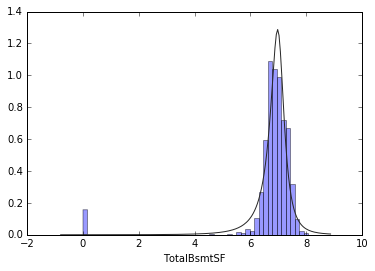

In [782]:
histlot = train2[train2['LotFrontage'].notnull()]
sns.distplot(dummy_train.TotalBsmtSF, kde=False, fit=st.johnsonsu)

In [940]:
train2[train2['LotFrontage'].notnull()].LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

## Cleaning and munging Data

In [1019]:
full_df['PoolQC'].fillna('No Pool',inplace = True)
full_df['MiscFeature'].fillna('None',inplace = True)
full_df['Alley'].fillna('No Alley Access',inplace = True)
full_df['Fence'].fillna('No Fence',inplace = True)
full_df['FireplaceQu'].fillna('No Fireplace',inplace = True)
full_df['LotFrontage'] = full_df['LotFrontage'].fillna(full_df.groupby(['Neighborhood'])['LotFrontage'].transform('mean').round())
full_df['GarageYrBlt'].fillna('No Garage',inplace = True)
full_df['GarageType'].fillna('No Garage',inplace = True)
full_df['GarageFinish'].fillna('No Garage',inplace = True)
full_df['GarageQual'].fillna('No Garage',inplace = True)
full_df['GarageCond'].fillna('No Garage',inplace = True)
full_df['BsmtFinType2'].fillna('No Garage',inplace = True)
full_df['BsmtExposure'].fillna('No Garage',inplace = True)
full_df['BsmtFinType1'].fillna('No Garage',inplace = True)
full_df['BsmtCond'].fillna('No Garage',inplace = True)
full_df['BsmtQual'].fillna('No Garage',inplace = True)
full_df['MasVnrArea'].fillna(0,inplace = True)
full_df['MasVnrType'].fillna('None',inplace = True)
full_df['Electrical'].fillna('SBrkr', inplace = True)

full_df['BsmtFinSF1'] = full_df['BsmtFinSF1'].fillna(full_df.groupby(['Neighborhood'])['BsmtFinSF1'].transform('mean'))
full_df['BsmtFinSF2'] = full_df['BsmtFinSF2'].fillna(full_df.groupby(['Neighborhood'])['BsmtFinSF2'].transform('mean'))
full_df['BsmtUnfSF'] = full_df['BsmtUnfSF'].fillna(full_df.groupby(['Neighborhood'])['BsmtUnfSF'].transform('mean'))
full_df['TotalBsmtSF'] = full_df['TotalBsmtSF'].fillna(full_df.groupby(['Neighborhood'])['TotalBsmtSF'].transform('mean'))
full_df['BsmtHalfBath'] = full_df['BsmtHalfBath'].fillna(full_df.groupby(['Neighborhood'])['BsmtHalfBath'].transform('mean'))
full_df['BsmtFullBath'] = full_df['BsmtFullBath'].fillna(full_df.groupby(['Neighborhood'])['BsmtFullBath'].transform('mean'))
full_df['BsmtFullBath'] = full_df['BsmtFullBath'].fillna(full_df.groupby(['Neighborhood'])['BsmtFullBath'].transform('mean'))
full_df['GarageCars'] = full_df['GarageCars'].fillna(full_df.groupby(['Neighborhood'])['GarageCars'].transform('mean'))
full_df['GarageArea'] = full_df['GarageArea'].fillna(full_df.groupby(['Neighborhood'])['GarageArea'].transform('mean'))
full_df['Exterior1st'] = full_df['Exterior1st'].fillna('VinylSd')
full_df['Exterior2nd'] = full_df['Exterior2nd'].fillna('VinylSd')
full_df['Functional'] = full_df['Functional'].fillna('Typ')
full_df.KitchenQual.fillna(lambda x: random.choice(full_df[full_df['KitchenQual'] != np.nan]["KitchenQual"]), inplace =True)
full_df['MSZoning'] = full_df['MSZoning'].fillna('RL')
full_df['SaleType'] = full_df['SaleType'].fillna('WD')
full_df['Utilities'] = full_df['Utilities'].fillna('AllPub')

## Normalizing Data

In [1020]:
#stats.skew(train2[quant])
full_df.skew()

1stFlrSF          1.470360
2ndFlrSF          0.862118
3SsnPorch        11.381914
BedroomAbvGr      0.326492
BsmtFinSF1        1.426255
BsmtFinSF2        4.148279
BsmtFullBath      0.624567
BsmtHalfBath      3.933340
BsmtUnfSF         0.920021
EnclosedPorch     4.005950
Fireplaces        0.733872
FullBath          0.167692
GarageArea        0.241912
GarageCars       -0.217618
GrLivArea         1.270010
HalfBath          0.694924
KitchenAbvGr      4.304467
LotArea          12.829025
LotFrontage       1.460582
LowQualFinSF     12.094977
MSSubClass        1.376165
MasVnrArea        2.614936
MiscVal          21.958480
MoSold            0.195985
OpenPorchSF       2.536417
OverallCond       0.570605
OverallQual       0.197212
PoolArea         16.907017
SalePrice         1.882876
ScreenPorch       3.948723
TotRmsAbvGrd      0.758757
TotalBsmtSF       1.163403
WoodDeckSF        1.843380
YearBuilt        -0.600114
YearRemodAdd     -0.451252
YrSold            0.132467
dtype: float64

PoolArea    40.177307
dtype: float64

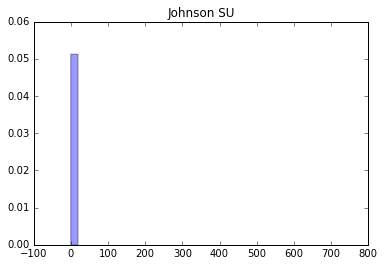

In [1021]:
import scipy.stats as st
import seaborn as sns

y = pd.DataFrame(train2.PoolArea)

plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)

y.std()

In [1022]:
full_df.GrLivArea = np.log1p(full_df.GrLivArea)
full_df.MasVnrArea = np.log1p(full_df.MasVnrArea)
full_df.TotalBsmtSF = np.log1p(full_df.TotalBsmtSF)
full_df.LotFrontage = np.log1p(full_df.LotFrontage)
full_df.LotArea = np.log1p(full_df.LotArea)
full_df.SalePrice = np.log1p(full_df.SalePrice)
#train2.MiscVal = np.log1p(train2.MiscVal)
#train2.BsmtFinSF1 = np.log1p(train2.BsmtFinSF1)
#train2.BsmtHalfBath = np.log1p(train2.BsmtHalfBath)
#train2.BsmtFinSF2 = np.log1p(train2.BsmtFinSF2)
#train2['1stFlrSF'] = np.log1p(train2['1stFlrSF'])
#train2.OpenPorchSF = np.log1p(train2.OpenPorchSF)
#train2.WoodDeckSF = np.log1p(train2.WoodDeckSF)
#train2.BsmtHalfBath = np.log1p(train2.BsmtHalfBath)

In [1023]:
quant_feats = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
              'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
              'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
              'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
              'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
              'MiscVal','SalePrice','YearBuilt','YearRemodAdd']

qual_feats = [item for item in full_df.columns if item not in quant_feats]

In [1024]:
full_df[qual_feats] = full_df[qual_feats].astype(object)

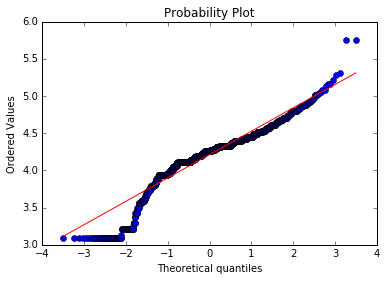

In [1025]:
import numpy as np 
import pylab 
import scipy.stats as stats
  
stats.probplot(full_df.LotFrontage, dist="norm", plot=pylab)
pylab.show()

## Dummyfying the Data

In [990]:
df = full_df.copy()

In [991]:
qual_dummies = pd.get_dummies(df[qual_feats], drop_first = True)

In [992]:
#qual_dummies.shape
dummy_train = pd.concat([full_df[quant_feats],qual_dummies],axis = 1)

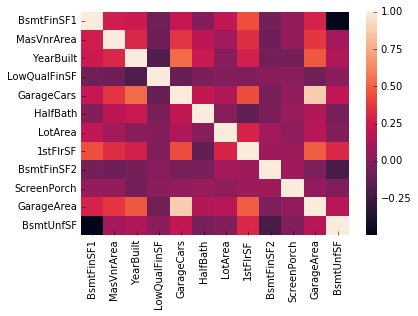

In [969]:
sns.heatmap(train2[quant].sample(15, axis=1).corr())

In [993]:
#dummy_train.iloc[[1298]]
dummy_train.drop(dummy_train.index[1298], inplace = True)
dummy_train.drop(dummy_train.index[523], inplace = True)
dummy_train.drop(dummy_train.index[1182], inplace = True)

In [994]:
list(dummy_train.shape)

[2913, 404]

In [995]:
train_df = dummy_train.head(1457)
test_df = dummy_train.tail(1459)

In [996]:
train_df.shape

(1457, 404)

## Regression

In [997]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [998]:
y = train_df.SalePrice
X = train_df.loc[:, train_df.columns != 'SalePrice']

In [999]:
train_X, val_X, train_y, val_y = train_test_split(X, y,test_size = 0.25,random_state=0)

In [1000]:
kag_reg = LinearRegression()

In [1001]:
kag_reg.fit(train_X,train_y, sample_weight=None)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [716]:
kag_reg.predict(val_X)

array([ 11.80388098,  12.09058497,  11.52262086,  11.80778303,
        12.67907499,  11.88468175,  12.05646217,  11.76956538,
        11.86048751,  12.47338825,  12.02688845,  12.26130533,
        12.11078017,  11.89383406,  11.30175105,  11.925358  ,
        12.20823219,  11.3620985 ,  12.02200284,  13.06215624,
        12.55253996,  11.99333785,  12.62985055,  11.60083162,
        11.69876533,  11.77220618,  11.70846997,  11.25243261,
        11.89175414,  12.60763157,  11.9924625 ,  12.35185074,
        12.29063779,  12.17143393,  13.01059937,  11.92905909,
        11.8010004 ,  12.11266355,  11.90617691,  11.56045016,
        11.74687568,  12.20822338,  12.50311476,  11.63879954,
        12.32355072,  11.75287874,  12.53867954,  11.80267627,
        11.67289306,  12.42801173,  12.47938687,  11.52177607,
        11.57518904,  11.88547946,  12.91025074,  12.41482935,
        12.56578595,  11.73153168,  12.09180679,  11.84813415,
        11.70708846,  11.76434546,  11.58213642,  11.85

In [717]:
kag_reg.score(val_X,val_y)

0.87805116970306585

## Ridge and Lasso

In [1003]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [1009]:
ridge_reg = RidgeCV(cv=10)

ridge_reg.fit(train_X, train_y)

ridge_reg.predict(val_X)

ridge_reg.score(val_X, val_y)

0.9325051696803387

In [885]:
ridge_reg

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=10, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [1014]:
lasso_reg = LassoCV(cv=10, alphas = (.001,1.0,10.0))

lasso_reg.fit(train_X, train_y)

lasso_reg.predict(val_X)

lasso_reg.score(val_X, val_y)

0.93117303400327134